<IPython.core.display.Javascript object>


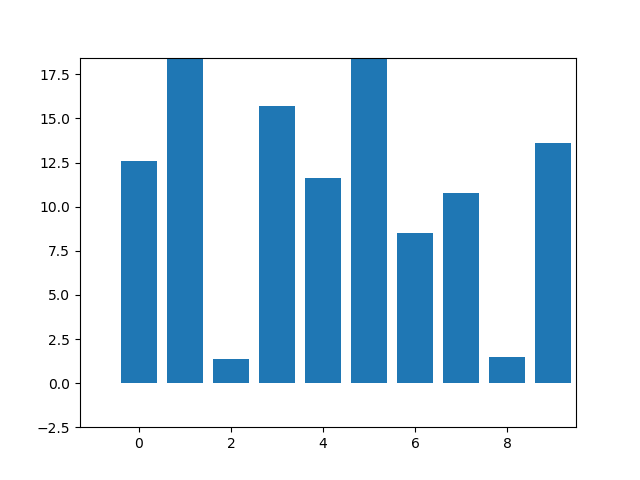

In [25]:
%matplotlib notebook
# draggable rectangle with the animation blit techniques; see
# http://www.scipy.org/Cookbook/Matplotlib/Animations
import numpy as np
import matplotlib.pyplot as plt

class DraggableRectangle:
    lock = None  # only one can be animated at a time
    def __init__(self, rect):
        self.rect = rect
        self.press = None
        self.background = None

    def connect(self):
        'connect to all the events we need'
        self.cidpress = self.rect.figure.canvas.mpl_connect(
            'button_press_event', self.on_press)
        self.cidrelease = self.rect.figure.canvas.mpl_connect(
            'button_release_event', self.on_release)
        self.cidmotion = self.rect.figure.canvas.mpl_connect(
            'motion_notify_event', self.on_motion)

    def on_press(self, event):
        'on button press we will see if the mouse is over us and store some data'
        if event.inaxes != self.rect.axes: return
        if DraggableRectangle.lock is not None: return
        contains, attrd = self.rect.contains(event)
        if not contains: return
        print('event contains', self.rect.xy)
        x0, y0 = self.rect.xy
        self.press = x0, y0, event.xdata, event.ydata
        DraggableRectangle.lock = self

        # draw everything but the selected rectangle and store the pixel buffer
        canvas = self.rect.figure.canvas
        axes = self.rect.axes
        self.rect.set_animated(True)
        canvas.draw()
        self.background = canvas.copy_from_bbox(self.rect.axes.bbox)

        # now redraw just the rectangle
        axes.draw_artist(self.rect)

        # and blit just the redrawn area
        canvas.blit(axes.bbox)

    def on_motion(self, event):
        'on motion we will move the rect if the mouse is over us'
        if DraggableRectangle.lock is not self:
            return
        if event.inaxes != self.rect.axes: return
        x0, y0, xpress, ypress = self.press
        dx = event.xdata - xpress
        dy = event.ydata - ypress
        self.rect.set_x(x0+dx)
        self.rect.set_y(y0+dy)

        canvas = self.rect.figure.canvas
        axes = self.rect.axes
        # restore the background region
        canvas.restore_region(self.background)

        # redraw just the current rectangle
        axes.draw_artist(self.rect)

        # blit just the redrawn area
        canvas.blit(axes.bbox)

    def on_release(self, event):
        'on release we reset the press data'
        if DraggableRectangle.lock is not self:
            return

        self.press = None
        DraggableRectangle.lock = None

        # turn off the rect animation property and reset the background
        self.rect.set_animated(False)
        self.background = None

        # redraw the full figure
        self.rect.figure.canvas.draw()

    def disconnect(self):
        'disconnect all the stored connection ids'
        self.rect.figure.canvas.mpl_disconnect(self.cidpress)
        self.rect.figure.canvas.mpl_disconnect(self.cidrelease)
        self.rect.figure.canvas.mpl_disconnect(self.cidmotion)

fig = plt.figure()
ax = fig.add_subplot(111)
rects = ax.bar(range(10), 20*np.random.rand(10))
drs = []
for rect in rects:
    dr = DraggableRectangle(rect)
    dr.connect()
    drs.append(dr)

plt.show()

<IPython.core.display.Javascript object>


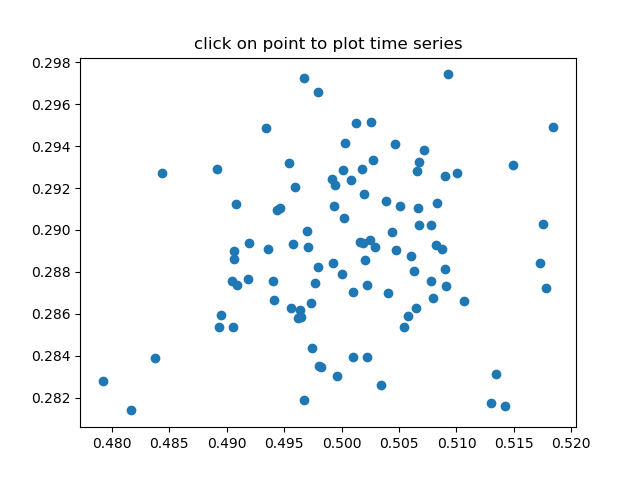

In [30]:
"""
compute the mean and stddev of 100 data sets and plot mean vs stddev.
When you click on one of the mu, sigma points, plot the raw data from
the dataset that generated the mean and stddev
"""
import numpy as np
import matplotlib.pyplot as plt

X = np.random.rand(100, 1000)
xs = np.mean(X, axis=1)
ys = np.std(X, axis=1)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title('click on point to plot time series')
line, = ax.plot(xs, ys, 'o', picker=5)  # 5 points tolerance
ax.text(0,0, "Nothing", va="center", ha="left")


def onpick(event):

    if event.artist!=line: return True

    N = len(event.ind)
    if not N: return True


    figi = plt.figure()
    for subplotnum, dataind in enumerate(event.ind):
        ax = figi.add_subplot(N,1,subplotnum+1)
        ax.plot(X[dataind])
        ax.text(0.05, 0.9, 'mu=%1.3f\nsigma=%1.3f'%(xs[dataind], ys[dataind]),
                transform=ax.transAxes, va='top')
        ax.set_ylim(-0.5, 1.5)
    figi.show()
    return True

fig.canvas.mpl_connect('pick_event', onpick)

plt.show()

<IPython.core.display.Javascript object>


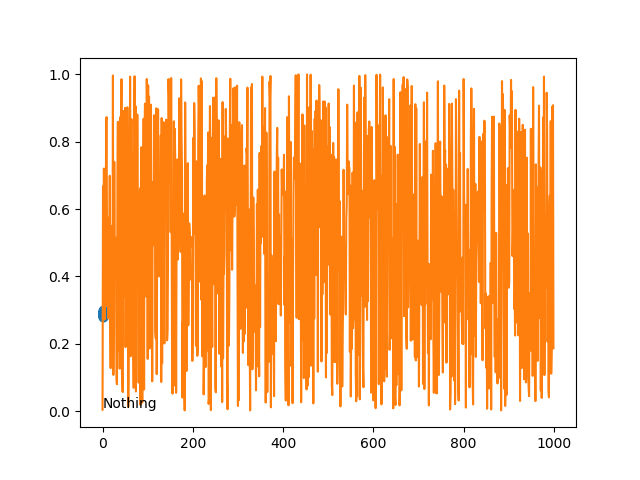

In [40]:
#%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

X = np.random.rand(100, 1000)
xs = np.mean(X, axis=1)
ys = np.std(X, axis=1)

fig = plt.figure()
ax = fig.add_subplot(111)
line, = ax.plot(xs, ys, 'o', picker=5)  # 5 points tolerance
ax.plot(X[1])

text=ax.text(0,0, "Nothing", va="bottom", ha="left")

def onclick1(event):
    tx = 'button=%d, x=%d, y=%d, xdata=%f, ydata=%f' % (event.button, event.x, event.y, event.xdata, event.ydata)
    text.set_text(tx)

cid = fig.canvas.mpl_connect('button_press_event', onclick1)

Using matplotlib backend: nbAgg


<IPython.core.display.Javascript object>


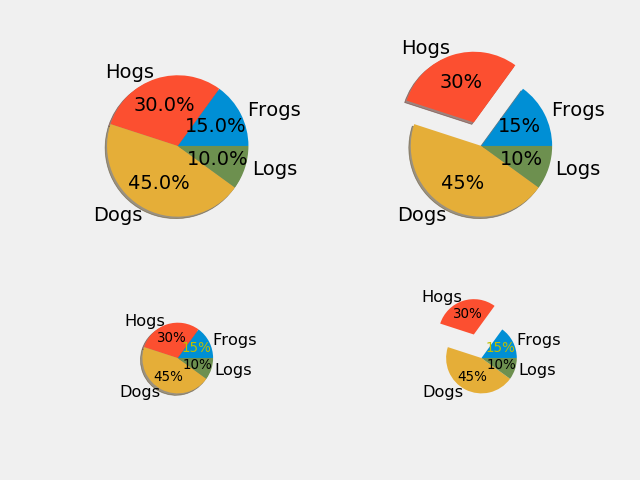

<IPython.core.display.Javascript object>


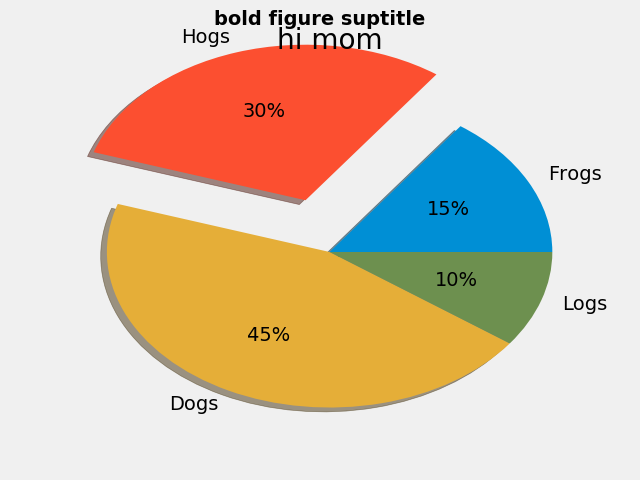

In [48]:
"""
Make a pie charts of varying size - see
http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.pie for the docstring.

This example shows a basic pie charts with labels optional features,
like autolabeling the percentage, offsetting a slice with "explode"
and adding a shadow, in different sizes.

"""
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
%matplotlib auto
# Some data

labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
fracs = [15, 30, 45, 10]

explode = (0, 0.35, 0, 0)

# Make square figures and axes

fig2 = plt.figure()

the_grid = GridSpec(2, 2)

plt.subplot(the_grid[0, 0], aspect=1)

plt.pie(fracs, labels=labels, autopct='%1.1f%%', shadow=True)

plt.subplot(the_grid[0, 1], aspect=1)

plt.pie(fracs, explode=explode, labels=labels, autopct='%.0f%%', shadow=True)

plt.subplot(the_grid[1, 0], aspect=1)

patches, texts, autotexts = plt.pie(fracs, labels=labels,
                                    autopct='%.0f%%',
                                    shadow=True, radius=0.5)

# Make the labels on the small plot easier to read.
for t in texts:
    t.set_size('smaller')
for t in autotexts:
    t.set_size('x-small')
autotexts[0].set_color('y')

plt.subplot(the_grid[1, 1], aspect=1)

# Turn off shadow for tiny plot with exploded slice.
patches, texts, autotexts = plt.pie(fracs, explode=explode,
                                    labels=labels, autopct='%.0f%%',
                                    shadow=False, radius=0.5)
for t in texts:
    t.set_size('smaller')
for t in autotexts:
    t.set_size('x-small')
autotexts[0].set_color('y')



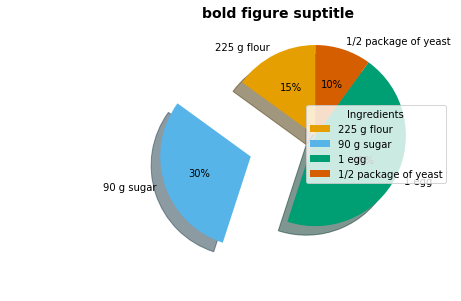

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.artist as art
from matplotlib import cm
import numpy as np

labels = ["225 g flour",
          "90 g sugar",
          "1 egg",
          "1/2 package of yeast"]
fracs = [15, 30, 45, 10]

explode = (0, 0.15, 0, 0)


colors = [[230/255,159/255,0], [86/255,180/255,233/255], [0,158/255,115/255], 
          [213/255,94/255,0], [0,114/255,178/255]]

fig3 = plt.figure()

#plt.style.use('fivethirtyeight')
fig3.suptitle('bold figure suptitle', fontsize=14, fontweight='bold')
ax = fig3.add_subplot(111)

cs=cm.Set1(4)

wedges,txts,atxts= ax.pie(fracs, explode=explode, labels=labels, autopct='%.0f%%', shadow=True,
       startangle=90, colors=colors,radius=0.2)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

ax.axis('equal')
ax.legend(wedges, labels,
          title="Ingredients",
          loc="center right")
#,
#          bbox_to_anchor=(1, 0, 0.5, 1))
#plt.text(x = 1976, y = 25, s = 'Physical Sciences', color = colors[5], weight = 'bold', rotation = 27,
#              backgroundcolor = '#f0f0f0')

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(labels[i], xy=(x, y), xytext=(.4*np.sign(x), .5*y),
                 horizontalalignment=horizontalalignment, **kw)

plt.show()

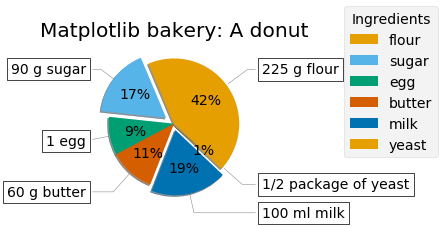

In [65]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

recipe = ["225 g flour",
          "90 g sugar",
          "1 egg",
          "60 g butter",
          "100 ml milk",
          "1/2 package of yeast"]

labels = [x.split()[-1] for x in recipe]


colors = [[230/255,159/255,0], [86/255,180/255,233/255], [0,158/255,115/255], 
          [213/255,94/255,0], [0,114/255,178/255]]

data = [225, 90, 50, 60, 100, 5]
explode = (0, 0.15, 0, 0,.1,0)

plt.style.use(['default','fivethirtyeight'])

wedges, texts,atext = ax.pie(data, explode=explode,wedgeprops=dict(width=1), 
                             startangle=-40,autopct='%.0f%%', 
                             shadow=True,colors=colors)


leg=ax.legend(wedges, labels,
          title="Ingredients",
          loc="lower left",
          bbox_to_anchor=(1.5, .25, 0.5,.25),)

arrw_props=dict(arrowstyle="-",color=".5")
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-",color=".5"),
          bbox=bbox_props, zorder=0, va="center")


for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                 horizontalalignment=horizontalalignment, **kw)

tit=ax.set_title("Matplotlib bakery: A donut")

plt.show()

In [68]:
art.getp(ax)

    adjustable = box
    agg_filter = None
    alpha = None
    anchor = C
    animated = False
    aspect = equal
    autoscale_on = False
    autoscalex_on = False
    autoscaley_on = False
    axes_locator = None
    axisbelow = True
    children = [<matplotlib.patches.Wedge object at 0x000001E60C6...
    clip_box = None
    clip_on = True
    clip_path = None
    contains = None
    data_ratio = 1.0
    default_bbox_extra_artists = [<matplotlib.patches.Wedge object at 0x000001E60C6...
    facecolor = (0.9411764705882353, 0.9411764705882353, 0.9411764...
    fc = (0.9411764705882353, 0.9411764705882353, 0.9411764...
    figure = Figure(432x216)
    frame_on = False
    geometry = (1, 1, 1)
    gid = None
    images = <a list of 0 AxesImage objects>
    label = 
    legend = Legend
    legend_handles_labels = ([], [])
    lines = <a list of 0 Line2D objects>
    navigate = True
    navigate_mode = None
    path_effects = []
    picker = None
    position = Bbox(x0=0.32625, y0=0.125, 

In [62]:
print(plt.style.available)

['seaborn-dark-palette', 'seaborn-whitegrid', 'seaborn-paper', 'seaborn-talk', 'classic', 'seaborn-pastel', 'seaborn-dark', 'fast', 'ggplot', 'fivethirtyeight', 'grayscale', 'seaborn-ticks', 'Solarize_Light2', 'seaborn-colorblind', 'seaborn-poster', 'seaborn-deep', 'seaborn-notebook', 'seaborn-bright', 'seaborn-darkgrid', 'dark_background', 'seaborn-muted', 'bmh', '_classic_test', 'tableau-colorblind10', 'seaborn', 'seaborn-white']
